<a href="https://colab.research.google.com/github/Guerrero-America/MetodosNumericos/blob/main/Polinomio_Interpolante_de_Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***POLINOMIO INTERPOLANTE DE NEWTON***

$Y_k= Y_0 + \binom{k}{1} \cdot \Delta Y_0 + \binom{k}{2} \cdot \Delta^2 Y_0 + \binom{k}{3} \cdot \Delta^3 Y_0 + \cdots + \binom{k}{j} \cdot \Delta^j Y_0 + \binom{k}{k} \cdot \Delta^k Y_0$

In [ ]:
# se importan las librerías que se usarán
import numpy as np
import matplotlib.pyplot as plt
import sympy as syp
import scipy.special as spc
from math import *

In [ ]:
# Se crean los arreglos con los datos correspondientes a X y a Y=F(X)
F=np.array([-5, 1, 9, 25, 55, 105]) # datos de Y=F(X)
X=np.array([0, 1, 2, 3, 4, 5]) # datos de X

<function matplotlib.pyplot.show(close=None, block=None)>

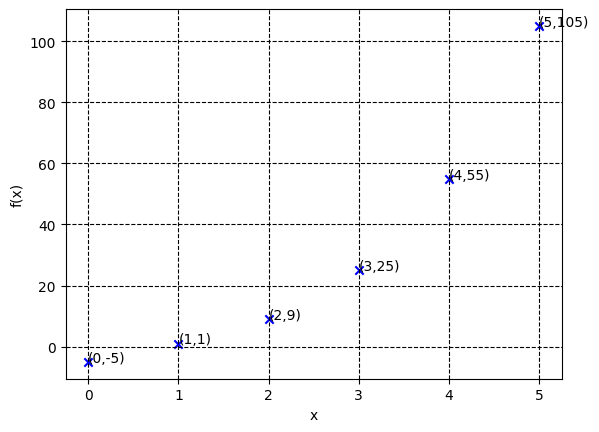

In [ ]:
# Graficar datos
plt.scatter(X, F, marker= 'x', color="blue") # se grafican los datos de F con respecto a X
plt.grid(color="Black", linestyle= "--") # cuadricula
plt.annotate('(0,-5)', (0, -5)) # punto 1
plt.annotate('(1,1)', (1, 1)) # punto 2
plt.annotate('(2,9)', (2, 9)) # punto 3
plt.annotate('(3,25)', (3, 25)) # punto 4
plt.annotate('(4,55)', (4, 55)) # punto 5
plt.annotate('(5,105)', (5, 105)) # punto 6
plt.xlabel("x") # rotulo
plt.ylabel("f(x)") # rotulo
plt.show # se muestra la grafica

In [ ]:
# Definimos el polinomio
def f(x):
    return -5+7*x-2*x**2+x**3

<function matplotlib.pyplot.show(close=None, block=None)>

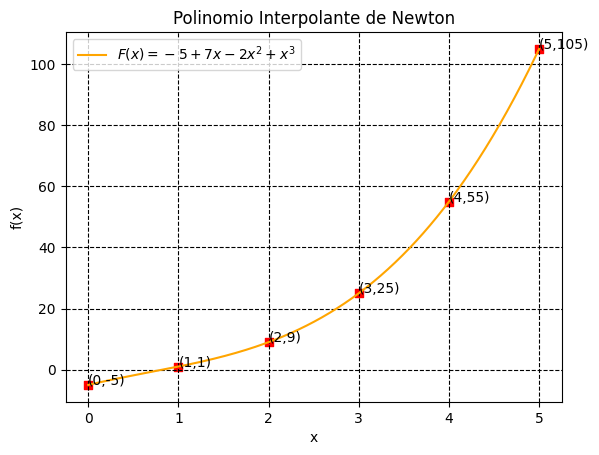

In [ ]:
# Graficacion del polinomio y datos de la tabla
x1=np.linspace(0,5,1000) # se crea el rango del grafico

plt.plot(x1,f(x1), color="orange") # se grafica el polinomio
plt.legend([r"$F(x)=-5 + 7x - 2x^2 + x^3$"]) # leyenda
plt.title("Polinomio Interpolante de Newton") # titulo
plt.scatter(X, F, marker= 's', color="red") # se grafican los datos de F con respecto a X
plt.grid(color="Black", linestyle= "--") # cuadricula
plt.annotate('(0,-5)', (0, -5))
plt.annotate('(1,1)', (1, 1))
plt.annotate('(2,9)', (2, 9))
plt.annotate('(3,25)', (3, 25))
plt.annotate('(4,55)', (4, 55))
plt.annotate('(5,105)', (5, 105)) # ^ puntos de la tabla
plt.xlabel("x") # rótulo
plt.ylabel("f(x)") # rótulo
plt.show # muestra el grafico

## Se escribirá el algoritmo para encontrar el polinomio en base a los coeficientes binomiales

In [ ]:
## se calcularán las diferencias dentro de un ciclo ##
print(f"X: {X}")
print(f"F: {F}")
D1 = np.diff(F) # se calculan las primeras diferencias
print(f"Δ1: {D1}")
diferencias = [D1]

# Ciclo para calcular las diferencias sucesivas. DifI -> diferencia inicial / DifA -> diferencia actual

i = 2  # Contador para los arreglos D2, D3, etc.
DifI = D1

while True:
# Calcula la siguiente diferencia
    DifA = np.diff(DifI)  # se calculan las diferencias sucesivas
    diferencias.append(DifA)
    print(f"Δ{i}: {DifA}")

# Verifica si todos los elementos del arreglo actual son iguales
    if np.all(DifA == DifA[0]):  # se verifica si todos los elementos son iguales
        print(f"Todos los elementos de Δ{i} son iguales, asi los elementos de Δ{i+1} serán 0. Por lo tanto el polinomio es de grado {i}.")
        break

# Si no todos los elementos son iguales, actualiza el arreglo para la siguiente iteración
    DifI= DifA  # se actualiza el arreglo para la siguiente iteración
    i += 1  # se aumenta el contador para el siguiente arreglo

print("\nArreglos de diferencias generados:")
for idx, arr in enumerate(diferencias, start=1):
    print(f"Δ{idx}: {arr}")

X: [0 1 2 3 4 5]
F: [ -5   1   9  25  55 105]
Δ1: [ 6  8 16 30 50]
Δ2: [ 2  8 14 20]
Δ3: [6 6 6]
Todos los elementos de Δ3 son iguales, asi los elementos de Δ4 serán 0. Por lo tanto el polinomio es de grado 3.

Arreglos de diferencias generados:
Δ1: [ 6  8 16 30 50]
Δ2: [ 2  8 14 20]
Δ3: [6 6 6]


Encontráremos el polinomio de grado 3 que pasa por todos los puntos formados por los arreglos establecidos.

Tenemos que $Y_{(k)}= Y_0 + \binom{k}{1} \cdot \Delta Y_0 + \binom{k}{2} \cdot \Delta^2 Y_0 + \binom{k}{3} \cdot \Delta^3 Y_0$

En donde $k= \frac{X_k - X_0}{h}$, en donde tomaremos $X_k= x$, $X_0=1$ y $h=X_1-X_0$

In [ ]:
## se calcularán los coeficientes ##
  # se tomarán los segundos elementos de cada arreglo, para formar la diagonal que comprende X0, Y0, ΔY0, Δ2Y0, Δ3Y0, que serán (X0=1, Y0=1, ΔY0=8, Δ2Y0=8, Δ3Y0=6)
Ys=np.array([F[1],D1[1],diferencias[0][1],diferencias[1][1]])
print(f"Ys: {Ys}")
x=syp.Symbol('x')
Xk=x #valor de Xk para obtener los coeficientes del polinomio
X0=1 #valor establecido de X0
h=abs(X[1]-X[2]) # se calcula la diferencia entre los valores de X
k=(Xk-X0)/h # se calcula k

  # de forma manual para un valor no entero de k
C1=(k)/factorial(1) # coeficiente 1
C2=((k)*(k-1))/factorial(2) # coeficiente 2
C3=((k)*(k-1)*(k-2))/factorial(3) # coeficiente 3

C1=syp.expand(C1) # se relizan los productos necesarios para C1
C2=syp.expand(C2) # "                                      " C2
C3=syp.expand(C3) # "                                      " C3

# Mostrar resultados
#print(f"C1: {C1}")
#print(f"C2: {C2}")
#print(f"C3: {C3}")

  # se sustituiran los coeficientes en Y(k)




Ys: [1 8 8 8]


In [ ]:
C3

x**3/6 - x**2 + 11*x/6 - 1

In [ ]:
type(C3)

sympy.core.mul.Mul